In [7]:
import numpy as np
import matplotlib.pyplot as plt
import glob

from LoR_Methods import Subtrial, LoR_Analysis, file_process
from Statistical_Methods import Statistic

LoR_stimulus_paths = file_process.extract_original_folder("/Users/haotianli/Code/EngertLab/Data/stimulus_meanLoR_v3")
print("LoR_stimulus_paths Shape:", np.array(LoR_stimulus_paths).shape)
# print(LoR_stimulus_paths[0][0])

fish_number = 0
subtrial_number = 0
subtrial_list_index0 = []
subtrial_list_index1 = []
subtrial_list_index2 = []



        

LoR_stimulus_paths Shape: (8, 6)


In [8]:
for fish_individual in LoR_stimulus_paths:
    
    subtrial_object_index0 = []
    subtrial_object_index1 = []
    subtrial_object_index2 = []
    for subtrial in fish_individual:
        subtrial_matrix = np.load(subtrial)
        stimulus_index = LoR_Analysis.check_index(subtrial_matrix['stimulus_data'][:, 2], 1000)
        subtrial_object = Subtrial(subtrial_matrix, fish_number, subtrial_number, stimulus_index)
        
        if stimulus_index == 0:
            subtrial_object_index0.append(subtrial_object)
        elif stimulus_index == 1:
            subtrial_object_index1.append(subtrial_object)
        elif stimulus_index == 2:
            subtrial_object_index2.append(subtrial_object)
        else:
            raise ValueError("Invalid stimulus index.")
        
        subtrial_object.preference_analysis()
        subtrial_number += 1
    
    fish_number += 1
    subtrial_number = 0
    subtrial_list_index0.append(subtrial_object_index0)
    subtrial_list_index1.append(subtrial_object_index1)
    subtrial_list_index2.append(subtrial_object_index2)
    
    
print(subtrial_list_index0)
print(subtrial_list_index1)
print(subtrial_list_index2)

subtrial_list_index1[0][0].preference_analysis()
print(subtrial_list_index1[0][0].CL_preference)

Total bout number of fish 0, trial 0: 185 (stimulus_index = 1.0)
Total bout number of fish 0, trial 1: 126 (stimulus_index = 1.0)
Total bout number of fish 0, trial 2: 92 (stimulus_index = 1.0)
Total bout number of fish 0, trial 3: 63 (stimulus_index = 2.0)
Total bout number of fish 0, trial 4: 50 (stimulus_index = 0.0)
Total bout number of fish 0, trial 5: 36 (stimulus_index = 2.0)
Total bout number of fish 1, trial 0: 98 (stimulus_index = 1.0)
Total bout number of fish 1, trial 1: 18 (stimulus_index = 0.0)
Total bout number of fish 1, trial 2: 34 (stimulus_index = 2.0)
Total bout number of fish 1, trial 3: 27 (stimulus_index = 0.0)
Total bout number of fish 1, trial 4: 21 (stimulus_index = 1.0)
Total bout number of fish 1, trial 5: 20 (stimulus_index = 2.0)
Total bout number of fish 2, trial 0: 43 (stimulus_index = 1.0)
Total bout number of fish 2, trial 1: 51 (stimulus_index = 0.0)
Total bout number of fish 2, trial 2: 6 (stimulus_index = 0.0)
Total bout number of fish 2, trial 3: 8

In [2]:
# # print(subtrial_object_index2)
# # subtrial_object_index2[1].preference_analysis()

# bug_trial = np.load(LoR_stimulus_paths[0][5])
# stimulus_index = LoR_Analysis.check_index(bug_trial['stimulus_data'][:, 2], 1000)
# bug_object = Subtrial(bug_trial, fish_number, subtrial_number, stimulus_index)

# bug_object.preference_analysis()

Total bout number of fish 0 trial 0 : 36 ( stilumus_index = 2.0 )
Sub-subtrial Number: 0
Current_bout_number in CL: 1
Current_bout_number in CL: 2
Current_bout_number in CL: 3
Current_bout_number in Condition Group: 4
Current_bout_number in Condition Group: 5
Current_bout_number in Condition Group: 6
Current_bout_number in Condition Group: 7
Current_bout_number in Condition Group: 8
Current_bout_number in Condition Group: 9
Current_bout_number in Condition Group: 10
Current_bout_number in Condition Group: 11
Current_bout_number in Condition Group: 12
Sub-subtrial Number: 1
Current_bout_number in CL: 13
Current_bout_number in CL: 14
Current_bout_number in CL: 15
Current_bout_number in Condition Group: 16
Current_bout_number in Condition Group: 17
Sub-subtrial Number: 2
Current_bout_number in CL: 18
Current_bout_number in CL: 19
Current_bout_number in Condition Group: 20
Current_bout_number in Condition Group: 21
Current_bout_number in Condition Group: 22
Current_bout_number in Condition

In [ ]:
print(subtrial_list_index1[0][0].Condition_preference)
print(subtrial_list_index1[0][0].stimulus_index)

In [28]:
index0_across_subsubtrials = [] # shape=[fish, subsubtrials]=[8, 5]
for fish in subtrial_list_index0:
    fish_across_subtrials_CL = []
    fish_across_subtrials_Condition_Group = []
    for subtrials in fish: # subtrials.CL_preference.shape=[5, x]
         for i in range(5):
            if len(subtrials.CL_preference[i]) != 0:
                fish_across_subtrials_CL.append(sum(subtrials.CL_preference[i]) / len(subtrials.CL_preference[i]))
                # print(sum(subtrials.CL_preference[i]) / len(subtrials.CL_preference[i]))
            else:
                fish_across_subtrials_CL.append(np.nan)
                
            if len(subtrials.Condition_preference[i]) != 0:
                fish_across_subtrials_Condition_Group.append(sum(subtrials.Condition_preference[i]) / len(subtrials.Condition_preference[i]))
            else:
                fish_across_subtrials_Condition_Group.append(np.nan)    
            
    index0_across_subsubtrials.append(fish_across_subtrials_CL)
    index0_across_subsubtrials.append(fish_across_subtrials_Condition_Group)
    print(fish_across_subtrials_CL)
    print(fish_across_subtrials_Condition_Group)
    
print(len(index0_across_subsubtrials)) # 16: 8 individuals * [fish_across_subtrials_CL, fish_across_subtrials_Condition_Group]
# index0_across_subsubtrials[2i]: CL
# index0_across_subsubtrials[2i+1]: Condition_Group
# 奇偶项分别相加

trial_on_timeSeries = [0.0] * 10
total_trial_count = 0
for i in range(16):
    temp = 0
    length = len(index0_across_subsubtrials[i])
    trial_count = length / 5
    print(trial_count)
    for j in range(int(trial_count)):
        for k in range(5):
            if i%2 == 0:
                trial_on_timeSeries[2*k] += index0_across_subsubtrials[i][k+j*5]
            else:
                trial_on_timeSeries[2*k+1] += index0_across_subsubtrials[i][k+j*5]
        
    total_trial_count += trial_count
            
total_trial_count /= 2
print(trial_on_timeSeries)

trial_on_timeSeries_sum_index0 = [0.0] * 10
trial_on_timeSeries_count_index0 = [0] * 10

for i in range(16):
    length = len(index0_across_subsubtrials[i])
    trial_count = length // 5
    print(f"i={i}, trial_count={trial_count}")

    for j in range(trial_count):
        for k in range(5):
            val = index0_across_subsubtrials[i][k + j * 5]
            if not np.isnan(val):
                if i % 2 == 0:
                    trial_on_timeSeries_sum_index0[2 * k] += val
                    trial_on_timeSeries_count_index0[2 * k] += 1
                else:
                    trial_on_timeSeries_sum_index0[2 * k + 1] += val
                    trial_on_timeSeries_count_index0[2 * k + 1] += 1

trial_on_timeSeries_avg_index0 = [
    trial_on_timeSeries_sum_index0[i] / trial_on_timeSeries_count_index0[i] if trial_on_timeSeries_count_index0[i] > 0 else np.nan
    for i in range(10)
]

print("Mean per time point (excluding NaN):", trial_on_timeSeries_avg_index0)


[0.3333333333333333, nan, 0.0, 0.16666666666666666, 0.0]
[0.5, 0.0, 0.25, 0.125, 0.25]
[0.0, nan, nan, 0.3333333333333333, 0.0, 0.2, nan, nan, 0.5, nan]
[1.0, nan, 0.0, 0.2222222222222222, nan, 1.0, nan, 0.375, nan, nan]
[0.3333333333333333, nan, 0.0, nan, 0.1, nan, nan, 0.6666666666666666, nan, 0.0, nan, 0.0, 0.06666666666666667, nan, 0.125]
[0.5, 0.5, 0.0, nan, 0.5263157894736842, nan, nan, nan, nan, nan, nan, 0.15384615384615385, 0.0, nan, 0.3333333333333333]
[0.4, 0.8, nan, 0.2, 0.0]
[0.5, 0.5714285714285714, 1.0, 0.0, 1.0]
[0.47368421052631576, 0.5454545454545454, 0.8095238095238095, 0.65, 0.48, 0.75, 0.6, 0.7142857142857143, 0.5, 0.6666666666666666, 0.5, 0.5, 0.14285714285714285, 0.6666666666666666, 0.2857142857142857]
[0.0, 0.6379310344827587, 0.4426229508196721, 0.3972602739726027, 0.6029411764705882, 0.7021276595744681, 0.7619047619047619, 0.6086956521739131, 0.6521739130434783, 0.5769230769230769, 0.6, 0.5833333333333334, 0.55, 0.7391304347826086, 0.6]
[0.5, 0.5, 0.0, 0.33333

In [29]:
index1_across_subsubtrials = [] # shape=[fish, subsubtrials]=[8, 5]
for fish in subtrial_list_index1:
    fish_across_subtrials_CL = []
    fish_across_subtrials_Condition_Group = []
    for subtrials in fish: # subtrials.CL_preference.shape=[5, x]
         for i in range(5):
            if len(subtrials.CL_preference[i]) != 0:
                fish_across_subtrials_CL.append(sum(subtrials.CL_preference[i]) / len(subtrials.CL_preference[i]))
                # print(sum(subtrials.CL_preference[i]) / len(subtrials.CL_preference[i]))
            else:
                fish_across_subtrials_CL.append(np.nan)
                
            if len(subtrials.Condition_preference[i]) != 0:
                fish_across_subtrials_Condition_Group.append(sum(subtrials.Condition_preference[i]) / len(subtrials.Condition_preference[i]))
            else:
                fish_across_subtrials_Condition_Group.append(np.nan)    
            
    index1_across_subsubtrials.append(fish_across_subtrials_CL)
    index1_across_subsubtrials.append(fish_across_subtrials_Condition_Group)
    print(fish_across_subtrials_CL)
    print(fish_across_subtrials_Condition_Group)
    
print(len(index1_across_subsubtrials)) # 16: 8 individuals * [fish_across_subtrials_CL, fish_across_subtrials_Condition_Group]
# index0_across_subsubtrials[2i]: CL
# index0_across_subsubtrials[2i+1]: Condition_Group
# 奇偶项分别相加

trial_on_timeSeries = [0.0] * 10
total_trial_count = 0
for i in range(16):
    temp = 0
    length = len(index1_across_subsubtrials[i])
    trial_count = length / 5
    print(trial_count)
    for j in range(int(trial_count)):
        for k in range(5):
            if i%2 == 0:
                trial_on_timeSeries[2*k] += index1_across_subsubtrials[i][k+j*5]
            else:
                trial_on_timeSeries[2*k+1] += index1_across_subsubtrials[i][k+j*5]
        
    total_trial_count += trial_count
            
total_trial_count /= 2
print(trial_on_timeSeries)

trial_on_timeSeries_sum_index1 = [0.0] * 10
trial_on_timeSeries_count_index1 = [0] * 10

for i in range(16):
    length = len(index1_across_subsubtrials[i])
    trial_count = length // 5
    print(f"i={i}, trial_count={trial_count}")

    for j in range(trial_count):
        for k in range(5):
            val = index1_across_subsubtrials[i][k + j * 5]
            if not np.isnan(val):
                if i % 2 == 0:
                    trial_on_timeSeries_sum_index1[2 * k] += val
                    trial_on_timeSeries_count_index1[2 * k] += 1
                else:
                    trial_on_timeSeries_sum_index1[2 * k + 1] += val
                    trial_on_timeSeries_count_index1[2 * k + 1] += 1

trial_on_timeSeries_avg_index1 = [
    trial_on_timeSeries_sum_index1[i] / trial_on_timeSeries_count_index1[i] if trial_on_timeSeries_count_index1[i] > 0 else np.nan
    for i in range(10)
]

print("Mean per time point (excluding NaN):", trial_on_timeSeries_avg_index1)

[0.5, 0.3333333333333333, 0.0, 0.2857142857142857, 0.25, 0.2, 1.0, 0.375, 0.1111111111111111, 0.16666666666666666, 0.6666666666666666, 0.2, 0.0, 0.75, 0.2]
[0.425531914893617, 0.7142857142857143, 0.26666666666666666, 0.21428571428571427, 0.45, 0.625, 0.2222222222222222, 0.43478260869565216, 0.35714285714285715, 0.42857142857142855, 0.2608695652173913, 0.4, 0.38461538461538464, 0.2222222222222222, 0.36363636363636365]
[0.7272727272727273, 0.0, 0.375, 0.5, nan, 0.6666666666666666, 0.0, 0.0, 0.0, 0.3333333333333333]
[0.1, 0.15789473684210525, 0.19047619047619047, 0.2857142857142857, nan, 0.5, 0.0, nan, 0.16666666666666666, nan]
[0.3125, nan, nan, 0.0, 0.6666666666666666]
[0.35714285714285715, 1.0, nan, nan, 0.75]
[0.5714285714285714, 0.7142857142857143, 0.2222222222222222, 1.0, 0.5, 1.0, 0.8, 1.0, 0.5, 1.0, 0.25, nan, 0.0, 1.0, 0.14285714285714285, 0.8571428571428571, nan, 1.0, 0.0, 0.5714285714285714]
[0.3, 0.6153846153846154, nan, 0.8125, 1.0, 0.6666666666666666, nan, 1.0, 0.6, 1.0, 0.5

In [30]:
index2_across_subsubtrials = [] # shape=[fish, subsubtrials]=[8, 5]
for fish in subtrial_list_index2:
    fish_across_subtrials_CL = []
    fish_across_subtrials_Condition_Group = []
    for subtrials in fish: # subtrials.CL_preference.shape=[5, x]
         for i in range(5):
            if len(subtrials.CL_preference[i]) != 0:
                fish_across_subtrials_CL.append(sum(subtrials.CL_preference[i]) / len(subtrials.CL_preference[i]))
                # print(sum(subtrials.CL_preference[i]) / len(subtrials.CL_preference[i]))
            else:
                fish_across_subtrials_CL.append(np.nan)
                
            if len(subtrials.Condition_preference[i]) != 0:
                fish_across_subtrials_Condition_Group.append(sum(subtrials.Condition_preference[i]) / len(subtrials.Condition_preference[i]))
            else:
                fish_across_subtrials_Condition_Group.append(np.nan)    
            
    index2_across_subsubtrials.append(fish_across_subtrials_CL)
    index2_across_subsubtrials.append(fish_across_subtrials_Condition_Group)
    print(fish_across_subtrials_CL)
    print(fish_across_subtrials_Condition_Group)
    
print(len(index2_across_subsubtrials)) # 16: 8 individuals * [fish_across_subtrials_CL, fish_across_subtrials_Condition_Group]
# index0_across_subsubtrials[2i]: CL
# index0_across_subsubtrials[2i+1]: Condition_Group
# 奇偶项分别相加

trial_on_timeSeries = [0.0] * 10
total_trial_count = 0
for i in range(16):
    temp = 0
    length = len(index2_across_subsubtrials[i])
    trial_count = length / 5
    print(trial_count)
    for j in range(int(trial_count)):
        for k in range(5):
            if i%2 == 0:
                trial_on_timeSeries[2*k] += index2_across_subsubtrials[i][k+j*5]
            else:
                trial_on_timeSeries[2*k+1] += index2_across_subsubtrials[i][k+j*5]
        
    total_trial_count += trial_count
            
total_trial_count /= 2
print(trial_on_timeSeries)

trial_on_timeSeries_sum_index2 = [0.0] * 10
trial_on_timeSeries_count_index2 = [0] * 10

for i in range(16):
    length = len(index2_across_subsubtrials[i])
    trial_count = length // 5
    print(f"i={i}, trial_count={trial_count}")

    for j in range(trial_count):
        for k in range(5):
            val = index2_across_subsubtrials[i][k + j * 5]
            if not np.isnan(val):
                if i % 2 == 0:
                    trial_on_timeSeries_sum_index2[2 * k] += val
                    trial_on_timeSeries_count_index2[2 * k] += 1
                else:
                    trial_on_timeSeries_sum_index2[2 * k + 1] += val
                    trial_on_timeSeries_count_index2[2 * k + 1] += 1

trial_on_timeSeries_avg_index2 = [
    trial_on_timeSeries_sum_index2[i] / trial_on_timeSeries_count_index2[i] if trial_on_timeSeries_count_index2[i] > 0 else np.nan
    for i in range(10)
]

print("Mean per time point (excluding NaN):", trial_on_timeSeries_avg_index2)

[0.125, 0.5, 0.0, 0.125, 0.4444444444444444, 0.3333333333333333, 0.0, 0.0, 0.8571428571428571, 0.0]
[0.21428571428571427, 0.0, 0.0, 0.2727272727272727, 0.0, 0.6666666666666666, 0.0, 0.5, 0.5, nan]
[0.3333333333333333, nan, 0.16666666666666666, nan, nan, 1.0, nan, nan, 0.3333333333333333, nan]
[0.25, 0.7, nan, 0.0, 0.1, 0.6666666666666666, nan, 0.4, 0.0, 0.3333333333333333]
[0.6666666666666666, 0.3333333333333333, 0.5, 0.2, 0.14285714285714285, 0.29411764705882354, nan, nan, 0.07692307692307693, 0.0]
[nan, 0.45454545454545453, 0.75, 0.5238095238095238, 0.0, 1.0, nan, 0.23529411764705882, 0.1111111111111111, 0.1111111111111111]
[1.0, nan, 1.0, 1.0, 0.6]
[0.3333333333333333, nan, 1.0, 1.0, nan]
[0.8571428571428571, nan, 0.7857142857142857, 0.7058823529411765, 0.625, 0.8181818181818182, 1.0, 0.0, 0.5, 0.6666666666666666]
[0.6666666666666666, 0.2, 0.7111111111111111, 0.45161290322580644, 0.5172413793103449, 0.625, 0.5, 0.5, 0.3333333333333333, 0.4]
[0.6666666666666666, 1.0, 0.0, 0.0, 0.0, n

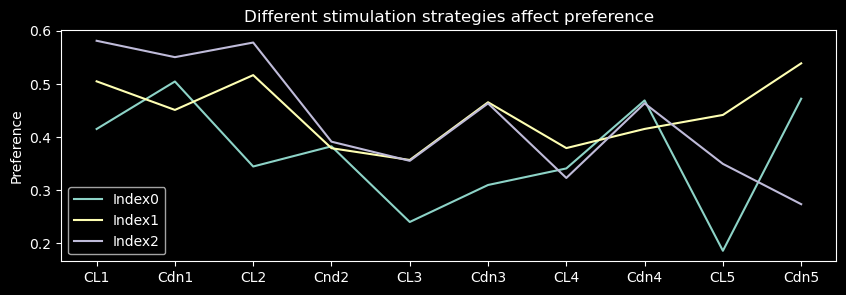

In [44]:
plt.figure(figsize=(10,3))
# trial_on_timeSeries_avg_index0-2
x = ["CL1", "Cdn1", "CL2", "Cnd2", "CL3", "Cdn3", "CL4", "Cdn4", "CL5", "Cdn5"]
plt.plot(x, trial_on_timeSeries_avg_index0, label="Index0")
plt.plot(x, trial_on_timeSeries_avg_index1, label="Index1")
plt.plot(x, trial_on_timeSeries_avg_index2, label="Index2")
plt.legend()
plt.style.use('dark_background')
plt.ylabel("Preference")
plt.title("Different stimulation strategies affect preference")
plt.show()

[[0.125, 0.28125], [0.35, 0.375], [0.09583333333333333, 0.24358974358974358], [0.46666666666666673, 0.5357142857142857], [0.3988095238095237, 0.6144927536231883], [0.3333333333333333, 0.4], [nan, 0.14285714285714285], [nan, 1.0]]


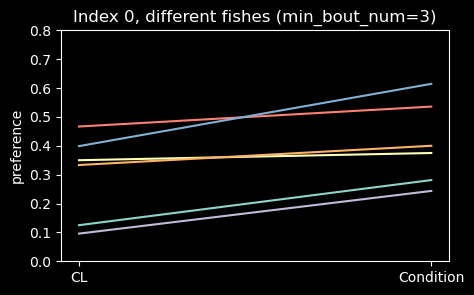

In [35]:
minimum_bout = 3
fish_data_index0 = [] # [8, 2]
for fish in subtrial_list_index0:
    for trial in fish:
        #### CL
        # print(trial.CL_preference) # [5, x]
        subtrial_count_CL = 0
        preference_int_CL = 0
        preference_avg_CL = np.nan
        for subtrial_itr in trial.CL_preference:
            # print(subtrial_itr)
            if(len(subtrial_itr) >= minimum_bout):
                preference_subavg_CL = sum(subtrial_itr) / len(subtrial_itr)
                subtrial_count_CL += 1
                preference_int_CL += preference_subavg_CL
        
        if(subtrial_count_CL != 0):
            preference_avg_CL = preference_int_CL / subtrial_count_CL
            
        #### Condition
        subtrial_count_Condition = 0
        preference_int_Condition = 0
        preference_avg_Condition = np.nan
        for subtrial_itr in trial.Condition_preference:
            if(len(subtrial_itr) >= minimum_bout):
                preference_subavg_Condition = sum(subtrial_itr) / len(subtrial_itr)
                subtrial_count_Condition += 1
                preference_int_Condition += preference_subavg_Condition
        
        if(subtrial_count_Condition != 0):
            preference_avg_Condition = preference_int_Condition / subtrial_count_Condition
    
    fish_data_index0.append([preference_avg_CL, preference_avg_Condition])

print(fish_data_index0)

plt.figure(figsize=(5,3))
x = ["CL", "Condition"]
for i in range(8):
    plt.plot(x, fish_data_index0[i])
plt.style.use('dark_background')
plt.title("Index 0, different fishes (min_bout_num=3)")
plt.ylabel("preference")
plt.ylim(0, 0.8)
plt.show()

[[0.36333333333333334, 0.32626870713827233], [0.5, 0.16666666666666666], [0.3263888888888889, 0.7023809523809524], [0.7142857142857142, 0.6976190476190476], [0.46598617756512495, 0.6118235930735931], [nan, 0.25], [nan, 0.4491071428571428], [nan, 0.5833333333333334]]


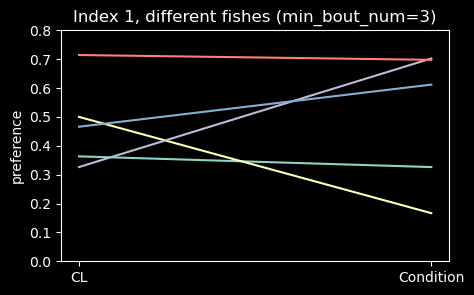

In [37]:
minimum_bout = 3
fish_data_index1 = [] # [8, 2]
for fish in subtrial_list_index1:
    for trial in fish:
        #### CL
        # print(trial.CL_preference) # [5, x]
        subtrial_count_CL = 0
        preference_int_CL = 0
        preference_avg_CL = np.nan
        for subtrial_itr in trial.CL_preference:
            # print(subtrial_itr)
            if(len(subtrial_itr) >= minimum_bout):
                preference_subavg_CL = sum(subtrial_itr) / len(subtrial_itr)
                subtrial_count_CL += 1
                preference_int_CL += preference_subavg_CL
        
        if(subtrial_count_CL != 0):
            preference_avg_CL = preference_int_CL / subtrial_count_CL
            
        #### Condition
        subtrial_count_Condition = 0
        preference_int_Condition = 0
        preference_avg_Condition = np.nan
        for subtrial_itr in trial.Condition_preference:
            if(len(subtrial_itr) >= minimum_bout):
                preference_subavg_Condition = sum(subtrial_itr) / len(subtrial_itr)
                subtrial_count_Condition += 1
                preference_int_Condition += preference_subavg_Condition
        
        if(subtrial_count_Condition != 0):
            preference_avg_Condition = preference_int_Condition / subtrial_count_Condition
    
    fish_data_index1.append([preference_avg_CL, preference_avg_Condition])

print(fish_data_index1)

plt.figure(figsize=(5,3))
x = ["CL", "Condition"]
for i in range(8):
    plt.plot(x, fish_data_index1[i])
plt.style.use('dark_background')
plt.title("Index 1, different fishes (min_bout_num=3)")
plt.ylabel("preference")
plt.ylim(0, 0.8)
plt.show()

[[0.3968253968253968, 0.5833333333333333], [0.3333333333333333, 0.4666666666666666], [0.12368024132730016, 0.15250544662309368], [0.6, 0.3333333333333333], [0.7424242424242424, 0.4716666666666667], [0.5, 0.5], [0.5095238095238095, 0.7410714285714286], [nan, 0.7142857142857143]]


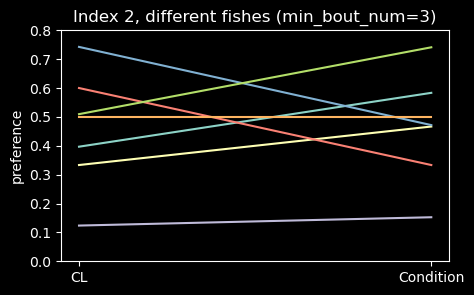

In [36]:
minimum_bout = 3
fish_data_index2 = [] # [8, 2]
for fish in subtrial_list_index2:
    for trial in fish:
        #### CL
        # print(trial.CL_preference) # [5, x]
        subtrial_count_CL = 0
        preference_int_CL = 0
        preference_avg_CL = np.nan
        for subtrial_itr in trial.CL_preference:
            # print(subtrial_itr)
            if(len(subtrial_itr) >= minimum_bout):
                preference_subavg_CL = sum(subtrial_itr) / len(subtrial_itr)
                subtrial_count_CL += 1
                preference_int_CL += preference_subavg_CL
        
        if(subtrial_count_CL != 0):
            preference_avg_CL = preference_int_CL / subtrial_count_CL
            
        #### Condition
        subtrial_count_Condition = 0
        preference_int_Condition = 0
        preference_avg_Condition = np.nan
        for subtrial_itr in trial.Condition_preference:
            if(len(subtrial_itr) >= minimum_bout):
                preference_subavg_Condition = sum(subtrial_itr) / len(subtrial_itr)
                subtrial_count_Condition += 1
                preference_int_Condition += preference_subavg_Condition
        
        if(subtrial_count_Condition != 0):
            preference_avg_Condition = preference_int_Condition / subtrial_count_Condition
    
    fish_data_index2.append([preference_avg_CL, preference_avg_Condition])

print(fish_data_index2)

plt.figure(figsize=(5,3))
x = ["CL", "Condition"]
for i in range(8):
    plt.plot(x, fish_data_index2[i])
plt.style.use('dark_background')
plt.title("Index 2, different fishes (min_bout_num=3)")
plt.ylabel("preference")
plt.ylim(0, 0.8)
plt.show()

In [41]:
print(subtrial_list_index0[0][0].CL_int_angles)
flat = [item for sublist in subtrial_list_index0[0][0].CL_int_angles
                for item in sublist]

print(flat)

[[np.float64(-4.228837634775094), np.float64(1.1551380972012577), np.float64(-0.5849545674805574)], [], [np.float64(-0.3478851339993714), np.float64(-1.9196214156112998), np.float64(-2.9941614978981015), np.float64(-4.821330813306207)], [np.float64(-1.174824084211684), np.float64(-1.0091106164044232), np.float64(-0.035773293550636964), np.float64(-0.9241636765393206), np.float64(-0.5180577433289733), np.float64(0.34014119631829054)], [np.float64(-3.095218456649574), np.float64(-0.5347346481883553), np.float64(-2.7028273317827987)]]
[np.float64(-4.228837634775094), np.float64(1.1551380972012577), np.float64(-0.5849545674805574), np.float64(-0.3478851339993714), np.float64(-1.9196214156112998), np.float64(-2.9941614978981015), np.float64(-4.821330813306207), np.float64(-1.174824084211684), np.float64(-1.0091106164044232), np.float64(-0.035773293550636964), np.float64(-0.9241636765393206), np.float64(-0.5180577433289733), np.float64(0.34014119631829054), np.float64(-3.095218456649574), np

In [45]:
int_angle_flatten = []

for fish in subtrial_list_index0:
    for trial in fish:
        flat = [item for sublist in trial.CL_int_angles
                        for item in sublist]
        
        int_angle_flatten.extend(flat)

print(len(int_angle_flatten))

for fish in subtrial_list_index1:
    for trial in fish:
        flat = [item for sublist in trial.CL_int_angles
                        for item in sublist]
        
        int_angle_flatten.extend(flat)
        
        
print(len(int_angle_flatten))


for fish in subtrial_list_index2:
    for trial in fish:
        flat = [item for sublist in trial.CL_int_angles
                        for item in sublist]
        
        int_angle_flatten.extend(flat)
        
        
print(len(int_angle_flatten))

344
736
1030


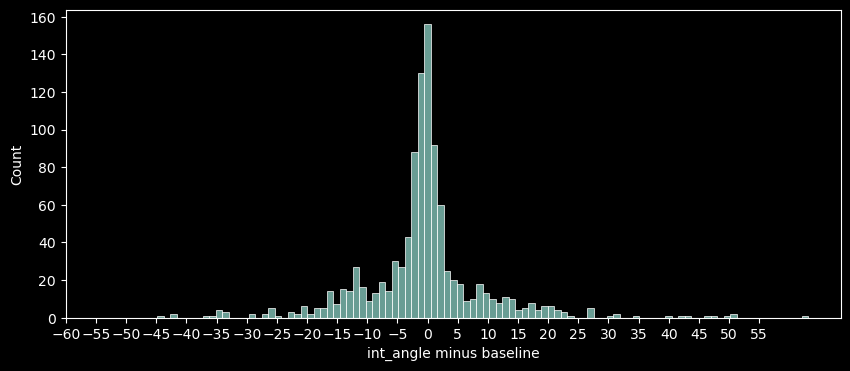

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.histplot(int_angle_flatten, bins=100, kde=False)
plt.xticks(np.arange(-60,60,5))
plt.xlabel("int_angle minus baseline")
plt.show()

In [57]:
print(len(subtrial_list_index0[0][0].subtrial_matrix['stimulus_data'][:, 10]))

36242


In [74]:
# print(subtrial_list_index0[0][0].subtrial_matrix['stimulus_data'][:, 10])
import numpy as np
import plotly.graph_objects as go


x = np.linspace(0, 36241, 36242)
y1 = subtrial_list_index0[0][0].subtrial_matrix['stimulus_data'][:, 10]
y2 = 50 * subtrial_list_index0[0][0].subtrial_matrix['stimulus_data'][:, 3] + 2
y3 = 50 * 0.05 * np.ones(36242, dtype=float) + 2

segments_curr_angle = [
    {'start': 0, 'end': 36241, 'color': 'Blue'},
]

segments_actual_gain = [
    {'start': 0, 'end': 36241, 'color': 'Red'},
]

segments_full_gain = [
    {'start': 0, 'end': 36241, 'color': 'Green'},
]

traces = []
for seg in segments_curr_angle:
    x_seg = x[seg['start']:seg['end']]
    y_seg = y1[seg['start']:seg['end']]
    trace = go.Scatter(
        x=x_seg,
        y=y_seg,
        mode='lines',
        line=dict(color=seg['color'], width=2),
        name=f"curr_angle"
    )
    traces.append(trace)

for seg in segments_full_gain:
    x_seg = x[seg['start']:seg['end']]
    y_seg = y3[seg['start']:seg['end']]
    trace = go.Scatter(
        x=x_seg,
        y=y_seg,
        mode='lines',
        line=dict(color=seg['color'], width=2),
        name=f"full_gain"
    )
    traces.append(trace)

for seg in segments_actual_gain:
    x_seg = x[seg['start']:seg['end']]
    y_seg = y2[seg['start']:seg['end']]
    trace = go.Scatter(
        x=x_seg,
        y=y_seg,
        mode='lines',
        line=dict(color=seg['color'], width=2),
        name=f"actual_gain"
    )
    traces.append(trace)
    




fig = go.Figure(data=traces)
fig.update_layout(
    title="tail_angle",
    xaxis_title="Time",
    yaxis_title="Value",
    width=1500,
    height=700
)
fig.show()